## SIR model Euler

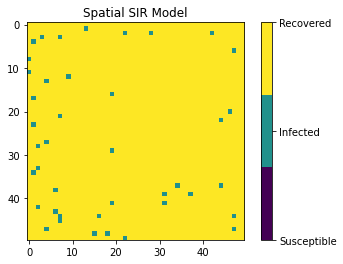

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Parameters ---
grid_size = 50
beta = 0.3     # infection probability per neighbor
gamma = 0.05   # recovery probability per time step
days = 100

# 0 = Susceptible, 1 = Infected, 2 = Recovered
grid = np.zeros((grid_size, grid_size), dtype=int)

# Initial infected
mid = grid_size // 2
grid[mid, mid] = 1

# --- Animation setup ---
fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis', 3)  # 3 discrete colors
im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=2)
ax.set_title('Spatial SIR Model')

# Add a colorbar as a legend
cbar = plt.colorbar(im, ax=ax, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Susceptible', 'Infected', 'Recovered'])

def count_infected_neighbors(x, y, grid):
    """Count how many neighbors are infected"""
    count = 0
    for i in range(max(0, x-1), min(grid_size, x+2)):
        for j in range(max(0, y-1), min(grid_size, y+2)):
            if (i, j) != (x, y) and grid[i, j] == 1:
                count += 1
    return count

def update(frame):
    global grid
    new_grid = grid.copy()
    
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == 0:  # susceptible
                infected_neighbors = count_infected_neighbors(i, j, grid)
                if infected_neighbors > 0:
                    if np.random.rand() < 1 - (1 - beta)**infected_neighbors:
                        new_grid[i, j] = 1
            elif grid[i, j] == 1:  # infected
                if np.random.rand() < gamma:
                    new_grid[i, j] = 2  # recover

    grid = new_grid
    im.set_data(grid)
    return [im]

ani = FuncAnimation(fig, update, frames=days, interval=200, blit=True)
HTML(ani.to_jshtml())

## Two starting points

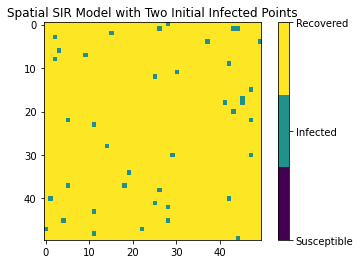

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Parameters ---
grid_size = 50
beta = 0.3
gamma = 0.05
days = 100

# 0 = Susceptible, 1 = Infected, 2 = Recovered
grid = np.zeros((grid_size, grid_size), dtype=int)

# Initial infected points
initial_infected = [(grid_size//3, grid_size//3), (2*grid_size//3, 2*grid_size//3)]
for x, y in initial_infected:
    grid[x, y] = 1

# --- Animation setup ---
fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis', 3)
im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=2)
ax.set_title('Spatial SIR Model with Two Initial Infected Points')

# Colorbar as legend
cbar = plt.colorbar(im, ax=ax, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Susceptible', 'Infected', 'Recovered'])

def count_infected_neighbors(x, y, grid):
    """Count infected neighbors around cell (x, y)"""
    count = 0
    for i in range(max(0, x-1), min(grid_size, x+2)):
        for j in range(max(0, y-1), min(grid_size, y+2)):
            if (i, j) != (x, y) and grid[i, j] == 1:
                count += 1
    return count

def update(frame):
    global grid
    new_grid = grid.copy()
    
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == 0:  # susceptible
                infected_neighbors = count_infected_neighbors(i, j, grid)
                if infected_neighbors > 0:
                    if np.random.rand() < 1 - (1 - beta)**infected_neighbors:
                        new_grid[i, j] = 1
            elif grid[i, j] == 1:  # infected
                if np.random.rand() < gamma:
                    new_grid[i, j] = 2  # recover

    grid = new_grid
    im.set_data(grid)
    return [im]

ani = FuncAnimation(fig, update, frames=days, interval=200, blit=True)
HTML(ani.to_jshtml())

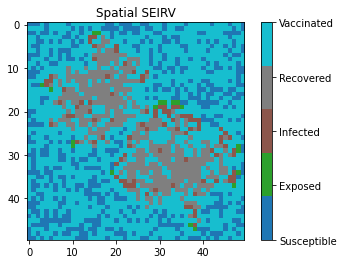

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Parameters ---
grid_size = 50
beta = 0.3       # infection probability
sigma = 0.2      # incubation rate (E->I)
gamma = 0.05     # recovery rate
vaccine_rate = 0.01  # fraction vaccinated per timestep
days = 100

# States: 0=S, 1=E, 2=I, 3=R, 4=V
grid = np.zeros((grid_size, grid_size), dtype=int)
exposure_time = np.zeros((grid_size, grid_size))  # track time in E state

# Initial infection points
initial_infected = [(grid_size//3, grid_size//3), (2*grid_size//3, 2*grid_size//3)]
for x, y in initial_infected:
    grid[x, y] = 1

# --- Animation setup ---
fig, ax = plt.subplots()
cmap = plt.get_cmap('tab10', 5)
im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=4)
ax.set_title('Spatial SEIRV')
cbar = plt.colorbar(im, ax=ax, ticks=[0,1,2,3,4])
cbar.ax.set_yticklabels(['Susceptible','Exposed','Infected','Recovered','Vaccinated'])

def count_infected_neighbors(x, y, grid):
    """Count infected neighbors (I only)"""
    count = 0
    for i in range(max(0, x-1), min(grid_size, x+2)):
        for j in range(max(0, y-1), min(grid_size, y+2)):
            if (i, j) != (x, y) and grid[i, j] == 2:
                count += 1
    return count

def update(frame):
    global grid, exposure_time
    new_grid = grid.copy()
    new_exposure_time = exposure_time.copy()
    
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i,j] == 0:  # Susceptible
                if np.random.rand() < vaccine_rate:  # vaccinate
                    new_grid[i,j] = 4
                else:
                    infected_neighbors = count_infected_neighbors(i,j,grid)
                    if infected_neighbors > 0:
                        if np.random.rand() < 1 - (1 - beta)**infected_neighbors:
                            new_grid[i,j] = 1  # become exposed
            elif grid[i,j] == 1:  # Exposed
                new_exposure_time[i,j] += 1
                if new_exposure_time[i,j] >= 1/sigma:
                    new_grid[i,j] = 2  # become infected
            elif grid[i,j] == 2:  # Infected
                if np.random.rand() < gamma:
                    new_grid[i,j] = 3  # recovered

    grid = new_grid
    exposure_time = new_exposure_time
    im.set_data(grid)
    return [im]

ani = FuncAnimation(fig, update, frames=days, interval=200, blit=True)
HTML(ani.to_jshtml())

## Comparison on deaths with and without vaccination

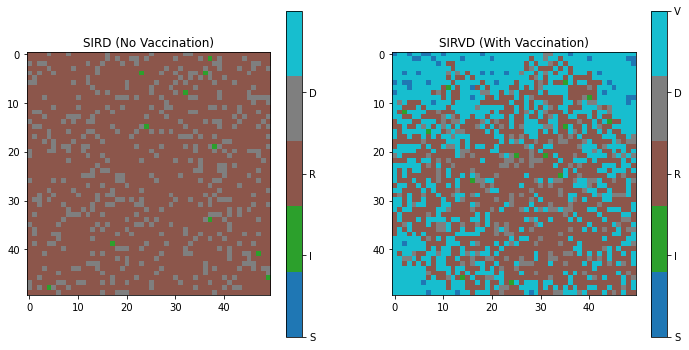

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Parameters ---
grid_size = 50
beta = 0.3        # infection probability per infected neighbor
gamma = 0.05      # recovery probability
mu = 0.01         # death probability
vaccine_rate = 0.02  # for SIRVD
days = 100

initial_infected = [(25,25), (35,35)]

# --- Function to initialize grid ---
def init_grid(vaccination=False):
    # 0=S, 1=I, 2=R, 3=D, 4=V (V only if vaccination=True)
    grid = np.zeros((grid_size, grid_size), dtype=int)
    for x, y in initial_infected:
        grid[x, y] = 1
    return grid

# --- Count infected neighbors ---
def infected_neighbors(x, y, grid):
    count = 0
    for i in range(max(0, x-1), min(grid_size, x+2)):
        for j in range(max(0, y-1), min(grid_size, y+2)):
            if (i,j)!=(x,y) and grid[i,j]==1:
                count +=1
    return count

# --- Update function ---
def update_grid(grid, vaccination=False):
    new_grid = grid.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i,j]==0:  # Susceptible
                if vaccination and np.random.rand() < vaccine_rate:
                    new_grid[i,j] = 4  # Vaccinated
                else:
                    if infected_neighbors(i,j,grid) > 0:
                        if np.random.rand() < 1 - (1-beta)**infected_neighbors(i,j,grid):
                            new_grid[i,j] = 1
            elif grid[i,j]==1:  # Infected
                if np.random.rand() < mu:
                    new_grid[i,j] = 3  # Dead
                elif np.random.rand() < gamma:
                    new_grid[i,j] = 2  # Recovered
    return new_grid

# --- Initialize grids ---
grid_sird = init_grid(vaccination=False)
grid_sirvd = init_grid(vaccination=True)

# --- Setup plots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
cmap = plt.get_cmap('tab10', 5)

im1 = ax1.imshow(grid_sird, cmap=cmap, vmin=0, vmax=4)
ax1.set_title('SIRD (No Vaccination)')
cbar1 = plt.colorbar(im1, ax=ax1, ticks=[0,1,2,3])
cbar1.ax.set_yticklabels(['S','I','R','D'])

im2 = ax2.imshow(grid_sirvd, cmap=cmap, vmin=0, vmax=4)
ax2.set_title('SIRVD (With Vaccination)')
cbar2 = plt.colorbar(im2, ax=ax2, ticks=[0,1,2,3,4])
cbar2.ax.set_yticklabels(['S','I','R','D','V'])

# --- Animation update ---
def update(frame):
    global grid_sird, grid_sirvd
    grid_sird = update_grid(grid_sird, vaccination=False)
    grid_sirvd = update_grid(grid_sirvd, vaccination=True)
    im1.set_data(grid_sird)
    im2.set_data(grid_sirvd)
    return [im1, im2]

ani = FuncAnimation(fig, update, frames=days, interval=200, blit=True)
HTML(ani.to_jshtml())

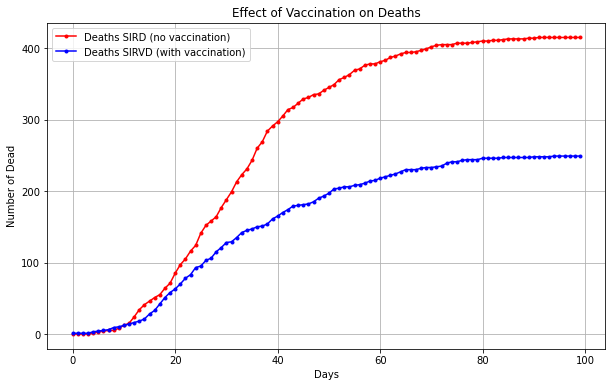

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def run_sird_sim(grid_size=50, beta=0.3, gamma=0.05, mu=0.01, days=100, initial_infected=[(25,25)], vaccine_rate=0.0):
    # 0=S, 1=I, 2=R, 3=D, 4=V
    grid = np.zeros((grid_size, grid_size), dtype=int)
    for x, y in initial_infected:
        grid[x, y] = 1

    counts = {'S':[], 'I':[], 'R':[], 'D':[], 'V':[]}

    def infected_neighbors(x, y):
        count = 0
        for i in range(max(0, x-1), min(grid_size, x+2)):
            for j in range(max(0, y-1), min(grid_size, y+2)):
                if (i,j)!=(x,y) and grid[i,j]==1:
                    count +=1
        return count

    for _ in range(days):
        new_grid = grid.copy()
        for i in range(grid_size):
            for j in range(grid_size):
                if grid[i,j]==0:  # S
                    if np.random.rand() < vaccine_rate:
                        new_grid[i,j] = 4
                    else:
                        if infected_neighbors(i,j) > 0:
                            if np.random.rand() < 1 - (1-beta)**infected_neighbors(i,j):
                                new_grid[i,j] = 1
                elif grid[i,j]==1:  # I
                    if np.random.rand() < mu:
                        new_grid[i,j] = 3
                    elif np.random.rand() < gamma:
                        new_grid[i,j] = 2
        grid = new_grid
        # count
        counts['S'].append(np.sum(grid==0))
        counts['I'].append(np.sum(grid==1))
        counts['R'].append(np.sum(grid==2))
        counts['D'].append(np.sum(grid==3))
        counts['V'].append(np.sum(grid==4))
    return counts

# --- Simulation ---
days = 100
initial_infected = [(25,25), (35,35)]
sird_counts = run_sird_sim(days=days, initial_infected=initial_infected, vaccine_rate=0.0)
sirvd_counts = run_sird_sim(days=days, initial_infected=initial_infected, vaccine_rate=0.02)

# --- Plot comparison with points ---
plt.figure(figsize=(10,6))
plt.plot(sird_counts['D'], 'r-o', label='Deaths SIRD (no vaccination)',markersize=3)     # 'o' marker
plt.plot(sirvd_counts['D'], 'b-o', label='Deaths SIRVD (with vaccination)',markersize=3) # 's' square marker
plt.xlabel('Days')
plt.ylabel('Number of Dead')
plt.title('Effect of Vaccination on Deaths')
plt.grid(True)
plt.legend()
plt.show()